In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Load data and replace outliers with the max value

In [19]:
df = pd.read_csv("data/bdata.csv")
df.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
0,cow,BoLAHD6,9,TBD,ALFYKDGKL,=,1.000000
1,cow,BoLAHD6,9,TBD,ALYEKKLAL,=,1.000000
2,cow,BoLAHD6,9,TBD,AMKDRFQPL,=,4.521706
3,cow,BoLAHD6,9,TBD,AQRELFFTL,=,1.000000
4,cow,BoLAHD6,9,TBD,FMKVKFEAL,=,1.576747


In [20]:
df.describe()

,peptide_length,meas
count,179692.000000,1.796920e+05
mean,9.249293,2.112472e+04
std,0.714603,5.986279e+04
min,8.000000,1.000000e+00
25%,9.000000,3.589934e+02
50%,9.000000,1.474869e+04
75%,9.000000,2.000000e+04
max,30.000000,1.427660e+07


In [21]:
df.loc[df.meas > 50000, "meas"] = 50000

In [26]:
df["pep_class"] = 0
df.loc[df.meas < 500, "pep_class"] = 1

# Affinity binding distribution

0.425625189809


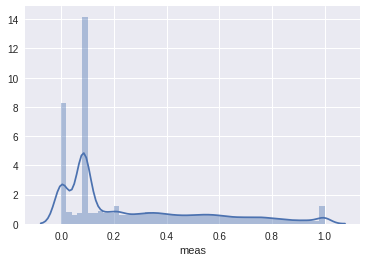

In [23]:
print(1 - np.log(500) / np.log(50000))
sns.distplot(1 - np.log(df.meas) / np.log(50000))

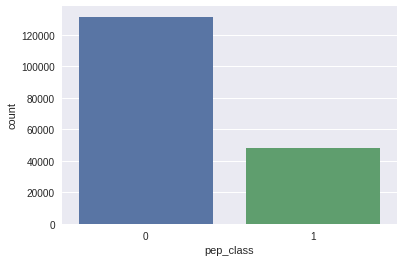

In [27]:
sns.countplot("pep_class", data=df)

# Relationship between the number of binded peptides and the binding threshold (binded - lesser or equal threshold)

In [12]:
MIN = int(df.meas.min())
MAX = int(df.meas.max() + 1)
num_bind = []
thr = list(range(MIN, MAX))
for i in range(MIN, MAX):
    num_bind.append(len(df.meas[df.meas >= i]))

num_bind = pd.Series(num_bind)
thr = pd.Series(thr)

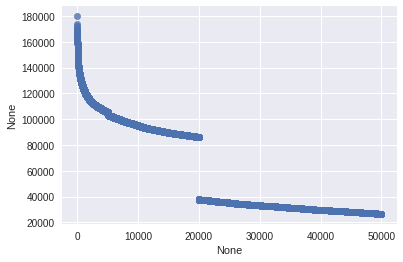

In [13]:
sns.regplot(thr, num_bind, fit_reg=False, logx=True)

# Distributions of HLA and peptide lengths

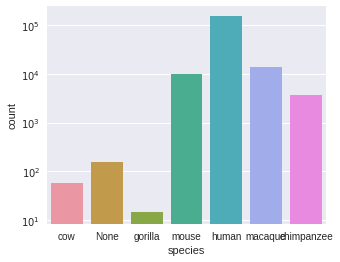

In [14]:
f, ax = plt.subplots(figsize=(5, 4))
ax.set(yscale="log")
sns.countplot(x="species", data=df, ax=ax)

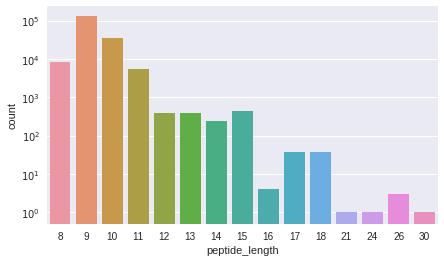

In [15]:
f, ax = plt.subplots(figsize=(7, 4))
ax.set(yscale="log")
sns.countplot(x="peptide_length", data=df)

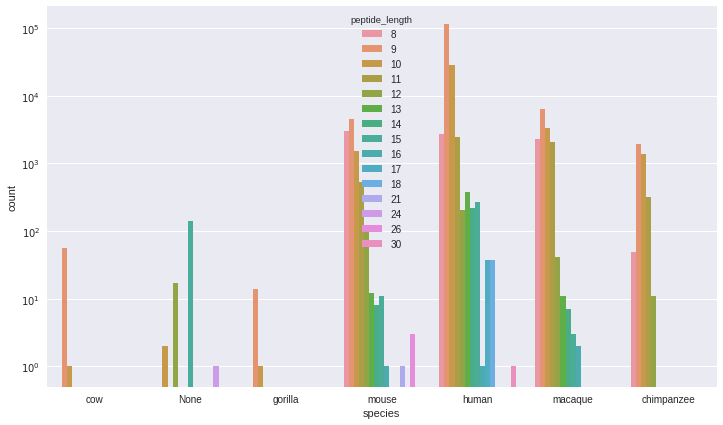

In [16]:
f, ax = plt.subplots(figsize=(12, 7))
ax.set(yscale="log")
sns.countplot(x="species", hue="peptide_length", data=df)

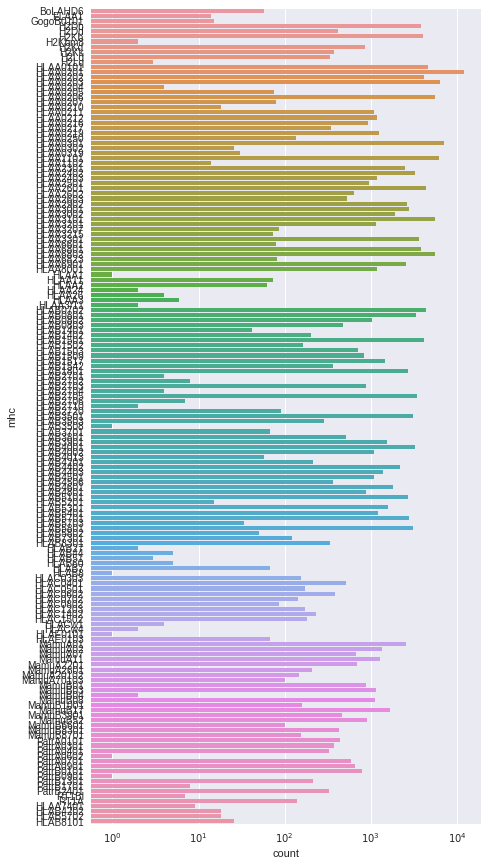

In [28]:
f, ax = plt.subplots(figsize=(7, 15))
ax.set(xscale="log")
sns.countplot(y="mhc", data=df)

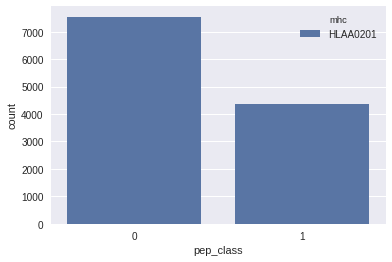

In [38]:
sns.countplot("pep_class", data=df.loc[df["mhc"] == "HLAA0201",:], hue="mhc")